In [1]:
#Linear Discriminant Analysis

In [2]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#import dataset 
dataset = pd.read_csv("Wine.csv")

In [4]:
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [5]:
x = dataset.iloc[: ,:-1].values

In [6]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
y = dataset.iloc[:, -1].values

In [8]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test, y_train,y_test = tts(x,y,test_size = 0.3,random_state = 42)

In [10]:
x_train

array([[1.349e+01, 3.590e+00, 2.190e+00, ..., 8.100e-01, 1.820e+00,
        5.800e+02],
       [1.251e+01, 1.730e+00, 1.980e+00, ..., 1.040e+00, 3.570e+00,
        6.720e+02],
       [1.233e+01, 9.900e-01, 1.950e+00, ..., 1.060e+00, 2.310e+00,
        7.500e+02],
       ...,
       [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
        1.547e+03],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00,
        4.380e+02]])

In [11]:
#Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
# disping training data
x_train

array([[ 0.62844732,  1.08120605, -0.65212742, ..., -0.64137827,
        -1.07090115, -0.51821917],
       [-0.54088231, -0.61299439, -1.42753372, ...,  0.34652993,
         1.33076844, -0.21506322],
       [-0.75565714, -1.28703113, -1.53830605, ...,  0.43243499,
        -0.39843366,  0.04196031],
       ...,
       [ 1.69038953, -0.48547393,  0.04943066, ...,  1.03377042,
         0.54851034,  2.66821356],
       [-0.32610748, -0.79516648, -0.39365865, ...,  0.00290969,
        -0.74152932, -0.79830892],
       [-0.74372521,  0.04282513,  0.34482354, ..., -0.6843308 ,
         1.07001574, -0.98613381]])

In [14]:
# Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA ( n_components =2)
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

In [15]:
# Apply Lr 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [16]:
y_test

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

In [17]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 1,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 1, 20,  0],
       [ 0,  0, 14]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9814814814814815

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


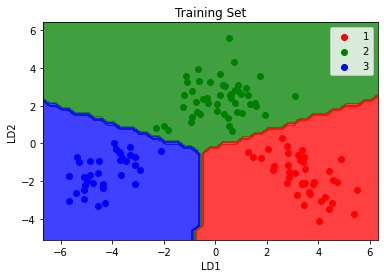

In [20]:
#visualization data
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min()-1,stop = x_set[:, 0].max()+1,step=0.25),
    np.arange(start = x_set[:, 1].min()-1,stop = x_set[:, 1].max()+1,step=0.25),
)
plt.contourf(x1,x2 , lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],c = ListedColormap(('red','green','blue'))(i), label =j)
        
plt.title("Training Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


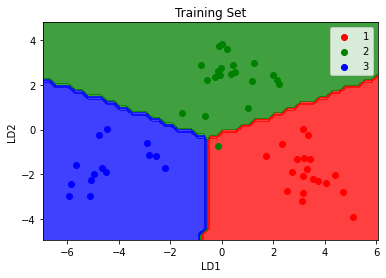

In [21]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min()-1,stop = x_set[:, 0].max()+1,step=0.25),
    np.arange(start = x_set[:, 1].min()-1,stop = x_set[:, 1].max()+1,step=0.25),
)
plt.contourf(x1,x2 , lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],c = ListedColormap(('red','green','blue'))(i), label =j)
        
plt.title("Training Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()